In [1]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
from sklearn import preprocessing
with open('../res/Staphylococcus_aureus/stats_with_alignment.json') as json_file:
    stats = json.load(json_file)
with open('../res/Staphylococcus_aureus/blast_genes_sum.json') as json_file:
    blast_stats = json.load(json_file)
    
genome_length = 2900155
average_read_length = 180
num_of_reads = 1294104
original_cov = float(num_of_reads*average_read_length)/genome_length

[Text(0, 0.5, 'N50'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'N-50 to cov box-plot')]

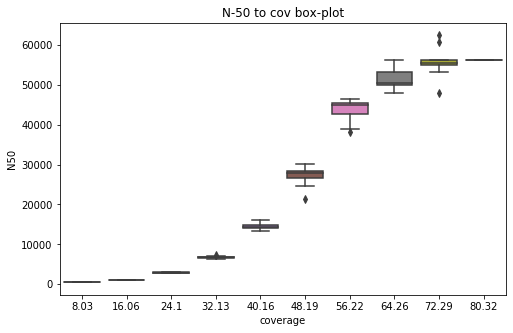

In [2]:
cov = sorted(stats.keys())
cov_fragmented = [round(float(x)*original_cov,2) for x in cov]
N50_scaffolds =list( map(lambda x:([n["Scaffold Stats"]["N50"] for n in stats[x]]), cov))
# N50_contigs = list(map(lambda x:np.mean([n["Contig Stats"]["N50"] for n in stats[x]]), cov))

# scaffolds
plt.figure(figsize=(8, 5))

sns.boxplot(cov_fragmented,N50_scaffolds).set(title= "N-50 to cov box-plot",ylabel="N50",xlabel = "coverage")
# plt.savefig(os.path.join(directory,"N50_scaff.png"))
#contigs
# plt.plot(cov, N50_contigs)
# plt.xlabel("coverage")
# plt.ylabel("N50 avg")
# plt.title("N50 per cov")
# plt.savefig(os.path.join(directory,"N50_contig.png"))

In [3]:
norm_N50 = preprocessing.normalize(N50_scaffolds)

[Text(0, 0.5, 'normlized N50'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'normlized box plot')]

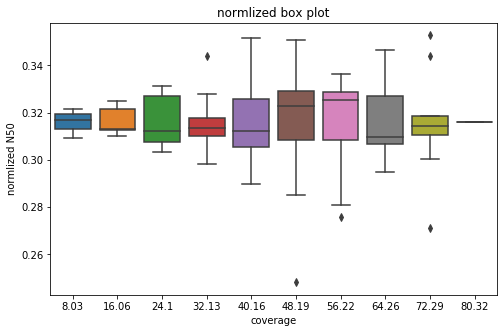

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(cov_fragmented,list(norm_N50)).set(xlabel="coverage", ylabel="normlized N50",title="normlized box plot")



[Text(0, 0.5, 'normlized similarity'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'normlized box plot')]

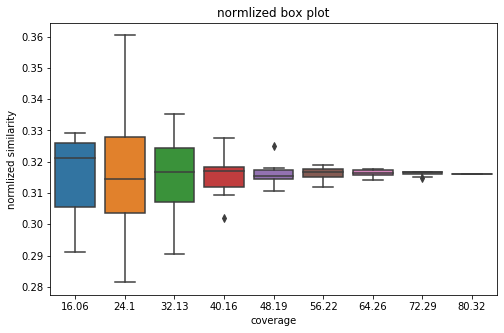

In [5]:
alined_precentage =list( map(lambda x:([n["Gene Alignment"]["total_alined_percentage"] for n in stats[x]]), cov[1:]))
flatten_aligned = [item for sublist in alined_precentage for item in sublist]
flatten_N50 = [item for sublist in N50_scaffolds[1:] for item in sublist]



plt.figure(figsize=(8, 5))
norm_similarity = preprocessing.normalize(alined_precentage)
sns.boxplot(cov_fragmented[1:],list(norm_similarity)).set(xlabel="coverage", ylabel="normlized similarity",title="normlized box plot")




[Text(0, 0.5, 'similarity precentage'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'similarity to cov box-plot')]

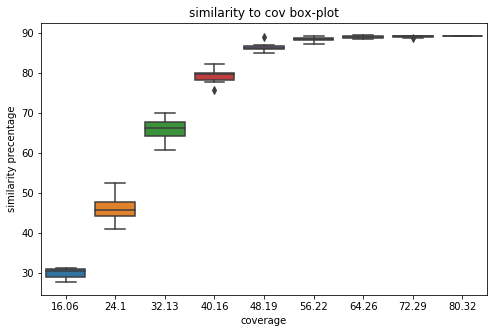

In [6]:
plt.figure(figsize=(8, 5))

sns.boxplot(cov_fragmented[1:],alined_precentage).set(title= "similarity to cov box-plot",ylabel="similarity precentage",xlabel = "coverage")

[Text(0, 0.5, 'N50'),
 Text(0.5, 0, 'similarity precentage'),
 Text(0.5, 1.0, 'aligned precentage to N50')]

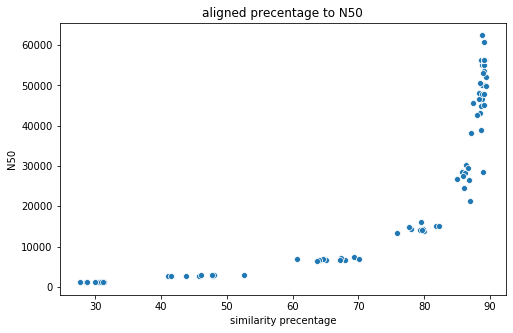

In [7]:
# scatter plot of N50 to total_alined_percentage

plt.figure(figsize=(8, 5))
sns.scatterplot(flatten_aligned,flatten_N50).set(title = "aligned precentage to N50",xlabel="similarity precentage", ylabel="N50")

In [8]:
# pearson correlation between aligned precentage to N50
scipy.stats.pearsonr(flatten_aligned,flatten_N50)

(0.8246372218973932, 1.7178030445233286e-23)

In [64]:
#blast stats
# cov_fragmented = [round(float(x)*original_cov,2) for x in cov]
# N50_scaffolds =list( map(lambda x:([n["Scaffold Stats"]["N50"] for n in stats[x]]), cov))
cov_b = sorted(blast_stats.keys())
cov_fragmented_b = [round(float(x)*original_cov,2) for x in cov_b]
temp = list(map(lambda x:[blast_stats[x][e] for e in blast_stats[x].keys()],cov_b))
temp2 = list(map(lambda cov:[[(exp[gene]["subject_length"],float(exp[gene]["align_length"])/float(exp[gene]["subject_length"])) for gene in exp.keys()] for exp in cov],temp))

#blast_stats["0.1"]["10"].keys()

cov_list = []
for cov in temp2:
    gene_list = []
    flag = True
    for i,exp in enumerate(cov):
        count = 0
        for length,align_precentage in exp:
            if flag:
                gene_list.append((length,align_precentage))
            else:
                gene_list[count] =(gene_list[count][0],gene_list[count][1] + align_precentage)
            count += 1
        flag = False
    
    cov_list.append(gene_list)
        
        
cov_list


            
        


[[('1935', 1.5395348837209302),
  ('1968', 2.6803861788617884),
  ('1827', 1.4937055281882867),
  ('2319', 1.1733505821474774),
  ('1662', 1.410950661853189),
  ('1776', 1.6627252252252256),
  ('1593', 2.7256748273697426),
  ('1755', 1.5505454438096926),
  ('1737', 1.3576655626176801),
  ('1641', 2.2202915895786095),
  ('1998', 1.0203945881365235),
  ('2790', 1.9011663932932388),
  ('1593', 1.8397910622486893),
  ('1776', 2.446788288288288),
  ('2250', 1.4939440023577957),
  ('2262', 1.0769113103582753),
  ('1578', 1.6268787023286932),
  ('2097', 1.9017771306552287),
  ('1689', 2.791160858291991),
  ('1740', 1.6291168772049622),
  ('3030', 2.0153264106898496),
  ('1845', 2.0061191746886795),
  ('1956', 1.3214853333041714),
  ('1683', 1.9645109155045024),
  ('2229', 1.6426049571607901),
  ('1842', 1.614002895403547),
  ('4500', 0.932940975192472),
  ('3507', 1.2949851213324268),
  ('2457', 1.3391902732272125),
  ('3411', 1.275727204487099),
  ('1638', 2.5422171090041124),
  ('1662', 3.0

In [73]:
list(map(list, zip(*cov_list[0])))

per_cov_x =[]
per_cov_y =[]
for cov in cov_list:
    x_axis,y_axis = list(map(list, zip(*cov)))
    per_cov_x.append(x_axis)
    per_cov_y.append(y_axis)


155

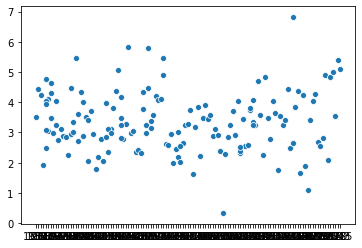

In [81]:
sns.scatterplot(per_cov_x[1],per_cov_y[1])

In [10]:
cov_b

['0.1',
 '0.2',
 '0.30000000000000004',
 '0.4',
 '0.5',
 '0.6',
 '0.7000000000000001',
 '0.8',
 '0.9',
 '1.0']